In [5]:
import numpy as np
import glob, json, os
from datasets import Dataset
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [2]:
image_data_dir = 'data/detection/images'
label_mapping = 'data/detection/label_mapping.json'
annotation_path = 'data/detection/instances_val2017.json'

In [3]:
with open(label_mapping, 'r') as f:
    id2cat = json.load(f)

id2cat = {cat_data['id'] : cat_data['name']  for cat_data in id2cat}
id2cat

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [4]:
# unique labels 
unique_labels = [0,
                1,
                2,
                3,
                4,
                5,
                6,
                7,
                8,
                9,
                10,
                12,
                13,
                14,
                15,
                16,
                17,
                18,
                19,
                20,
                21,
                22,
                23,
                24,
                26,
                27,
                30,
                31,
                32,
                33,
                34,
                35,
                36,
                37,
                38,
                39,
                40,
                41,
                42,
                43,
                45,
                46,
                47,
                48,
                49,
                50,
                51,
                52,
                53,
                54,
                55,
                56,
                57,
                58,
                59,
                60,
                61,
                62,
                63,
                64,
                66,
                69,
                71,
                72,
                73,
                74,
                75,
                76,
                77,
                78,
                79,
                80,
                81,
                83,
                84,
                85,
                86,
                87,
                88,
                89]

id2newid = {v: i for i, v in enumerate(unique_labels)}
id2catnew = {v: id2cat[i + 1] for i, v in id2newid.items()}
id2catnew

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [5]:
id2newid

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 26: 24,
 27: 25,
 30: 26,
 31: 27,
 32: 28,
 33: 29,
 34: 30,
 35: 31,
 36: 32,
 37: 33,
 38: 34,
 39: 35,
 40: 36,
 41: 37,
 42: 38,
 43: 39,
 45: 40,
 46: 41,
 47: 42,
 48: 43,
 49: 44,
 50: 45,
 51: 46,
 52: 47,
 53: 48,
 54: 49,
 55: 50,
 56: 51,
 57: 52,
 58: 53,
 59: 54,
 60: 55,
 61: 56,
 62: 57,
 63: 58,
 64: 59,
 66: 60,
 69: 61,
 71: 62,
 72: 63,
 73: 64,
 74: 65,
 75: 66,
 76: 67,
 77: 68,
 78: 69,
 79: 70,
 80: 71,
 81: 72,
 83: 73,
 84: 74,
 85: 75,
 86: 76,
 87: 77,
 88: 78,
 89: 79}

In [6]:
def create_dataset():
    train_images = glob.glob(f'{image_data_dir}/*.*')
    print(f'Number of training images: {len(train_images)}')

    with open(annotation_path, 'r') as f:
        annotation_json = json.load(f)

    annotations = annotation_json['annotations']
    images = annotation_json['images']
    
    id2annotation = {}
    for annotation in annotations:
        if annotation['image_id'] in id2annotation:
            id2annotation[annotation['image_id']].append((annotation['bbox'], annotation['category_id'], annotation['area']))
        else:
            id2annotation[annotation['image_id']] = [(annotation['bbox'], annotation['category_id'], annotation['area'])]

    data_dict = {}
    data_dict['image'] = []
    data_dict['image_id'] = []
    data_dict['width'] = []
    data_dict['height'] = []
    data_dict['objects'] = []

    all_labels = []
    for image in images:
        height = image['height']
        width = image['width']
        image_id = image['id']
        file_name = image['file_name']
        image_path = os.path.join(image_data_dir, file_name)
        if os.path.exists(image_path):
            image_pil = Image.open(image_path)
            image_pil = image_pil.convert('RGB')
            if image_id in id2annotation:
                image_annotations = id2annotation[image_id]
                category, box, area = [] , [], []
                for annotation in image_annotations:
                    box_, category_, area_ = annotation
                    x, y, w, h = box_
                    if (x >= 0) and (y >= 0) and (w > 10) and (h > 10):
                        category.append(id2newid[category_-1])
                        box.append(box_)
                        area.append(area_)
                        all_labels.append(category_-1)

                data_dict['image'].append(image_pil)
                data_dict['image_id'].append(image_id)
                data_dict['width'].append(height)
                data_dict['height'].append(width)
                data_dict['objects'].append({
                    'bbox': box,
                    'category': category,
                    'area' : area
                })

            else:
                print(f'Image ID not found: {image_id}')

        else:
            print(f'Image not found: {image_path}')

    train_dataset = Dataset.from_dict(data_dict)
    return train_dataset, list(set(all_labels))

In [7]:
dataset, unique_labels = create_dataset()

Number of training images: 5000
Image ID not found: 226111
Image ID not found: 58636
Image ID not found: 458790
Image ID not found: 461275
Image ID not found: 268996
Image ID not found: 370999
Image ID not found: 481404
Image ID not found: 121153
Image ID not found: 310622
Image ID not found: 98497
Image ID not found: 228771
Image ID not found: 270386
Image ID not found: 240767
Image ID not found: 173183
Image ID not found: 560371
Image ID not found: 330554
Image ID not found: 550939
Image ID not found: 502910
Image ID not found: 382734
Image ID not found: 344611
Image ID not found: 127135
Image ID not found: 320706
Image ID not found: 64574
Image ID not found: 198915
Image ID not found: 101022
Image ID not found: 556498
Image ID not found: 308391
Image ID not found: 25593
Image ID not found: 536343
Image ID not found: 477118
Image ID not found: 528977
Image ID not found: 42888
Image ID not found: 41488
Image ID not found: 514540
Image ID not found: 374727
Image ID not found: 402096
Im

In [8]:
unique_labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 89]

In [9]:
dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x427>,
 'image_id': 397133,
 'width': 427,
 'height': 640,
 'objects': {'area': [1481.3806499999994,
   54085.6217,
   17376.918849999995,
   123.19339999999974,
   2136.46615,
   2016.1509000000015,
   10058.87035,
   1037.7818999999995,
   415.37435000000005,
   943.1977499999996,
   351.9638500000004,
   217.57500000000013,
   136.74489999999983,
   7249.863299999998,
   2287.9704499999984],
  'bbox': [[217.62, 240.54, 38.99, 57.75],
   [1.0, 240.24, 346.63, 186.76],
   [388.66, 69.92, 109.41, 277.62],
   [135.57, 249.43, 22.32, 28.79],
   [31.28, 344.0, 68.12, 40.83],
   [59.63, 287.36, 76.07, 41.3],
   [1.36, 164.33, 192.56, 98.37],
   [0.0, 262.81, 62.16, 36.77],
   [119.4, 272.51, 24.82, 34.25],
   [141.47, 267.91, 32.19, 35.86],
   [155.97, 168.95, 26.03, 17.13],
   [157.2, 114.15, 17.86, 15.82],
   [86.41, 293.97, 23.96, 11.18],
   [0.0, 210.9, 191.36, 98.98],
   [497.25, 203.4, 122.01, 28.61]],
  'category': [3

# Visualize Data

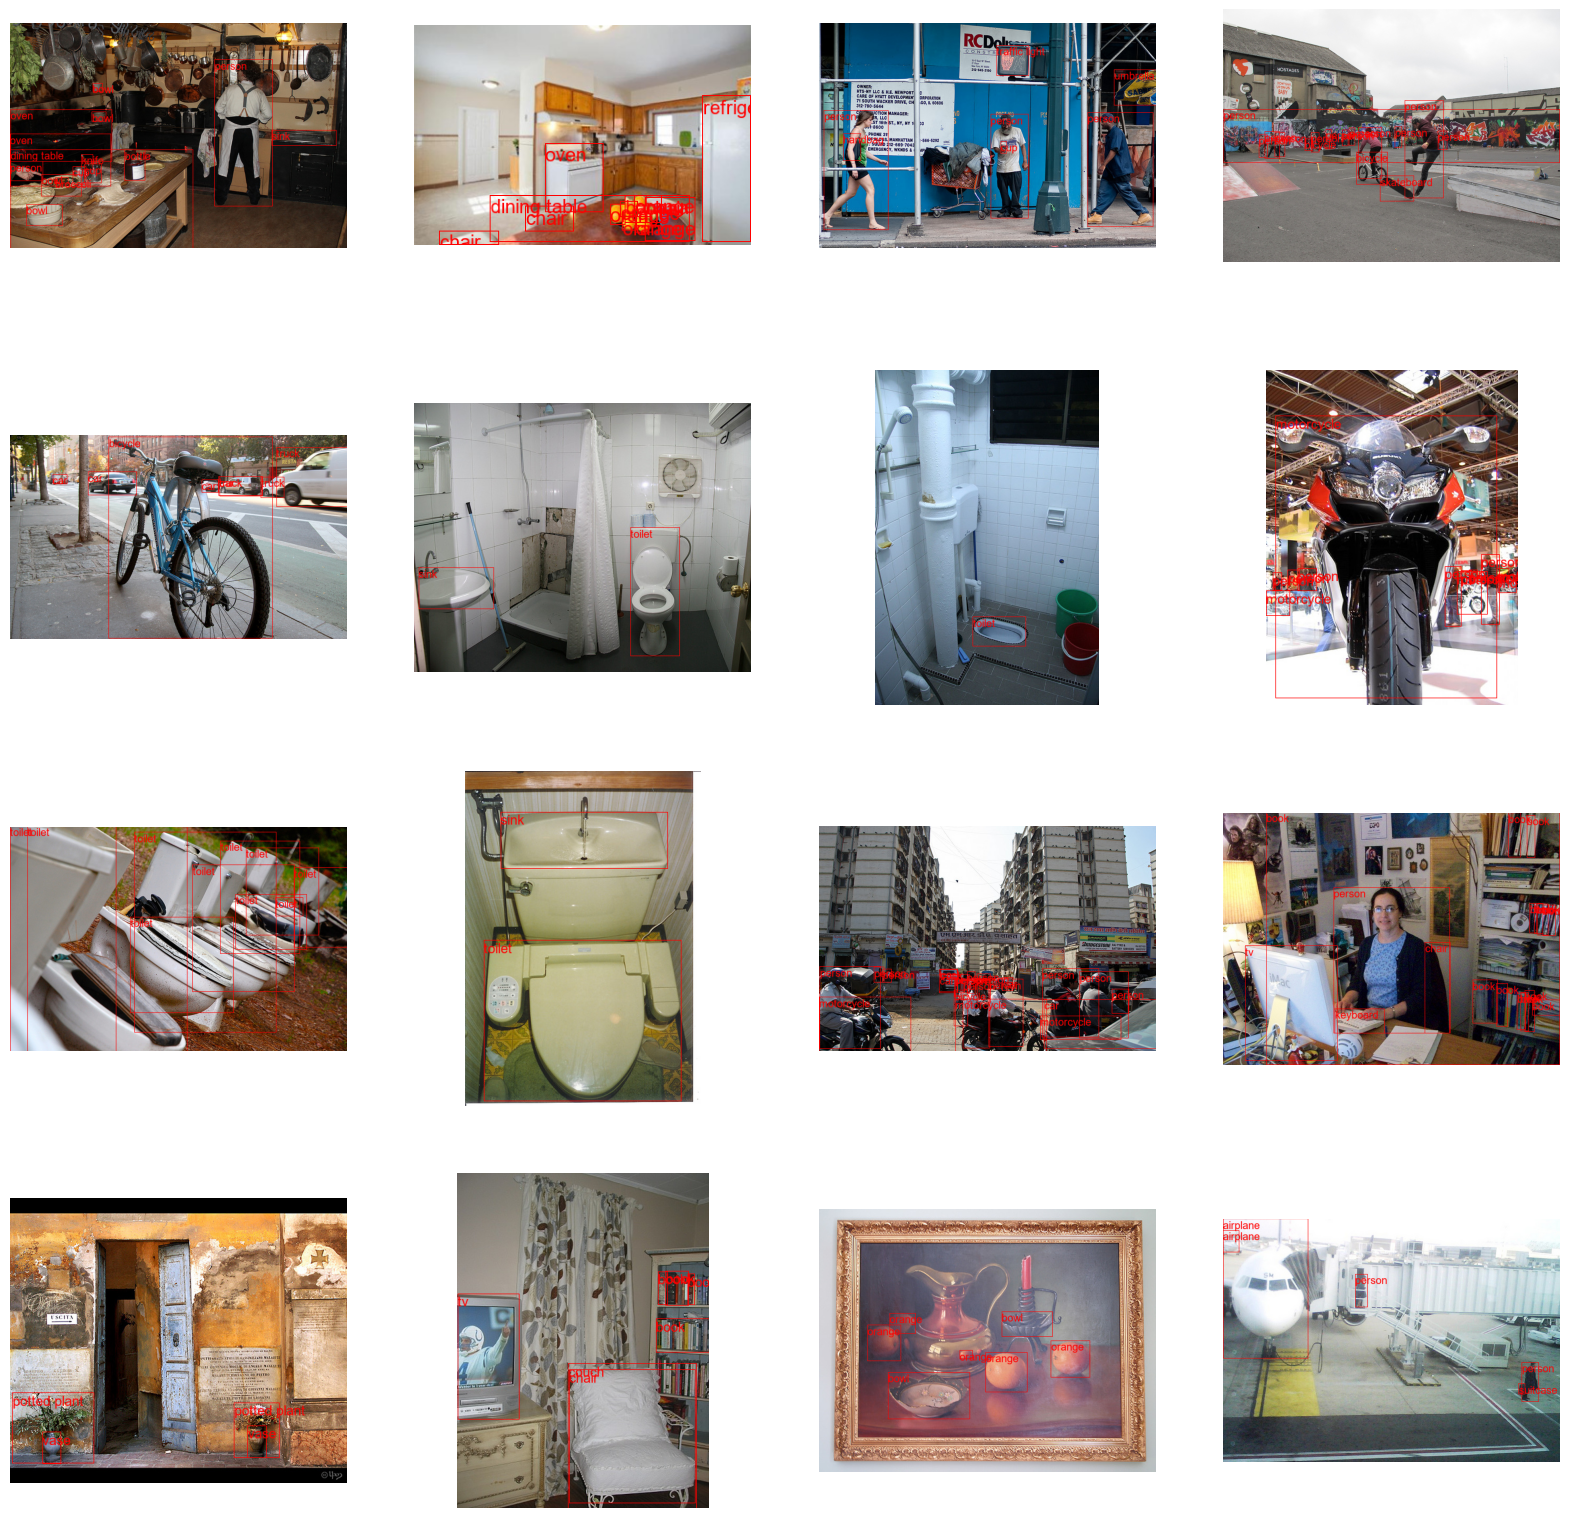

In [10]:
rand_idxs = np.random.choice(len(dataset), 16, replace=False)

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for idx, ax in enumerate(axes.flat):
    image = dataset[idx]['image']
    boxes = dataset[idx]['objects']['bbox']
    categories = dataset[idx]['objects']['category']
    draw = ImageDraw.Draw(image)

    for box, category in zip(boxes, categories):
        x, y, w, h = box
        draw.rectangle(((x, y), (x+w, y+h)), outline='red')
        draw.text((x, y), id2catnew[category], fill='red', font=ImageFont.truetype('arial.ttf', 20))

    ax.imshow(image)
    ax.axis('off')

plt.show()

In [11]:
from transformers import AutoImageProcessor

checkpoint = "facebook/detr-resnet-50"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [13]:
import albumentations
import numpy as np
import torch

transform = albumentations.Compose(
    [
        albumentations.Resize(480, 480),
        albumentations.HorizontalFlip(p=1.0),
        albumentations.RandomBrightnessContrast(p=1.0),
    ],
    bbox_params=albumentations.BboxParams(format="coco", label_fields=["category"]),
)

In [14]:
def formatted_anns(image_id, category, area, bbox):
    annotations = []
    for i in range(0, len(category)):
        new_ann = {
            "image_id": image_id,
            "category_id": category[i],
            "isCrowd": 0,
            "area": int(area[i]),
            "bbox": list(bbox[i]),
        }
        annotations.append(new_ann)

    return annotations

In [15]:
# transforming a batch
def transform_aug_ann(examples):
    image_ids = examples["image_id"]
    images, bboxes, area, categories = [], [], [], []
    for image, objects in zip(examples["image"], examples["objects"]):
        image = np.array(image.convert("RGB"))[:, :, ::-1]
        out = transform(image=image, bboxes=objects["bbox"], category=objects["category"])

        area.append(objects["area"])
        images.append(out["image"])
        bboxes.append(out["bboxes"])
        categories.append(out["category"])

    targets = [
            {"image_id": id_, "annotations": formatted_anns(id_, cat_, ar_, box_)}
            for id_, cat_, ar_, box_ in zip(image_ids, categories, area, bboxes)
            ]

    return image_processor(images=images, annotations=targets, return_tensors="pt")

In [16]:
dataset_preprocessed = dataset.with_transform(transform_aug_ann)
dataset_preprocessed

Dataset({
    features: ['image', 'image_id', 'width', 'height', 'objects'],
    num_rows: 4952
})

In [17]:
def collate_fn(batch):
    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item["labels"] for item in batch]
    
    batch = {}
    batch["pixel_values"] = encoding["pixel_values"]
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = labels
    return batch

In [18]:
from transformers import AutoModelForObjectDetection

model = AutoModelForObjectDetection.from_pretrained(
                                                    checkpoint,
                                                    id2label=id2catnew,
                                                    label2id={cat: i for i, cat in enumerate(id2catnew)},
                                                    ignore_mismatched_sizes=True,
                                                    )
model.to('cpu:0')

print('Model loaded successfully!')

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoin

Model loaded successfully!


In [19]:
from transformers import TrainingArguments

training_args = TrainingArguments(
                                output_dir="models/detr-resnet-50_finetuned-room-objects",
                                per_device_train_batch_size=2,
                                num_train_epochs=1,
                                fp16=False,
                                save_steps=1000,
                                logging_steps=50,
                                learning_rate=1e-5,
                                weight_decay=1e-4,
                                save_total_limit=2,
                                remove_unused_columns=False,
                                push_to_hub=True,
                                )

In [21]:
from transformers import Trainer

trainer = Trainer(
                model=model,
                args=training_args,
                data_collator=collate_fn,
                train_dataset=dataset_preprocessed,
                tokenizer=image_processor
                )

trainer.train()

  0%|          | 0/2476 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [20]:
trainer.push_to_hub()

NameError: name 'trainer' is not defined

# Inference

In [1]:
import torch
from PIL import Image
from transformers import DetrImageProcessor, DetrForObjectDetection
from transformers import AutoModelForObjectDetection, AutoImageProcessor

In [2]:
image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Ber

In [3]:
def inference_od(image_path):    
    image = Image.open(image_path).convert('RGB')

    plt.figure(figsize=(16, 16))
    draw = ImageDraw.Draw(image)

    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)

    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    objects_detected = []
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        label = model.config.id2label[label.item()]
        score = round(score.item(), 3)

        draw.rectangle(box, outline="red")
        draw.text((box[0], box[1]), f"{label} {score}", fill="red", font=ImageFont.truetype("arial.ttf", 15))
        objects_detected.append(label)
 
    plt.imshow(image)
    plt.show()

    return objects_detected

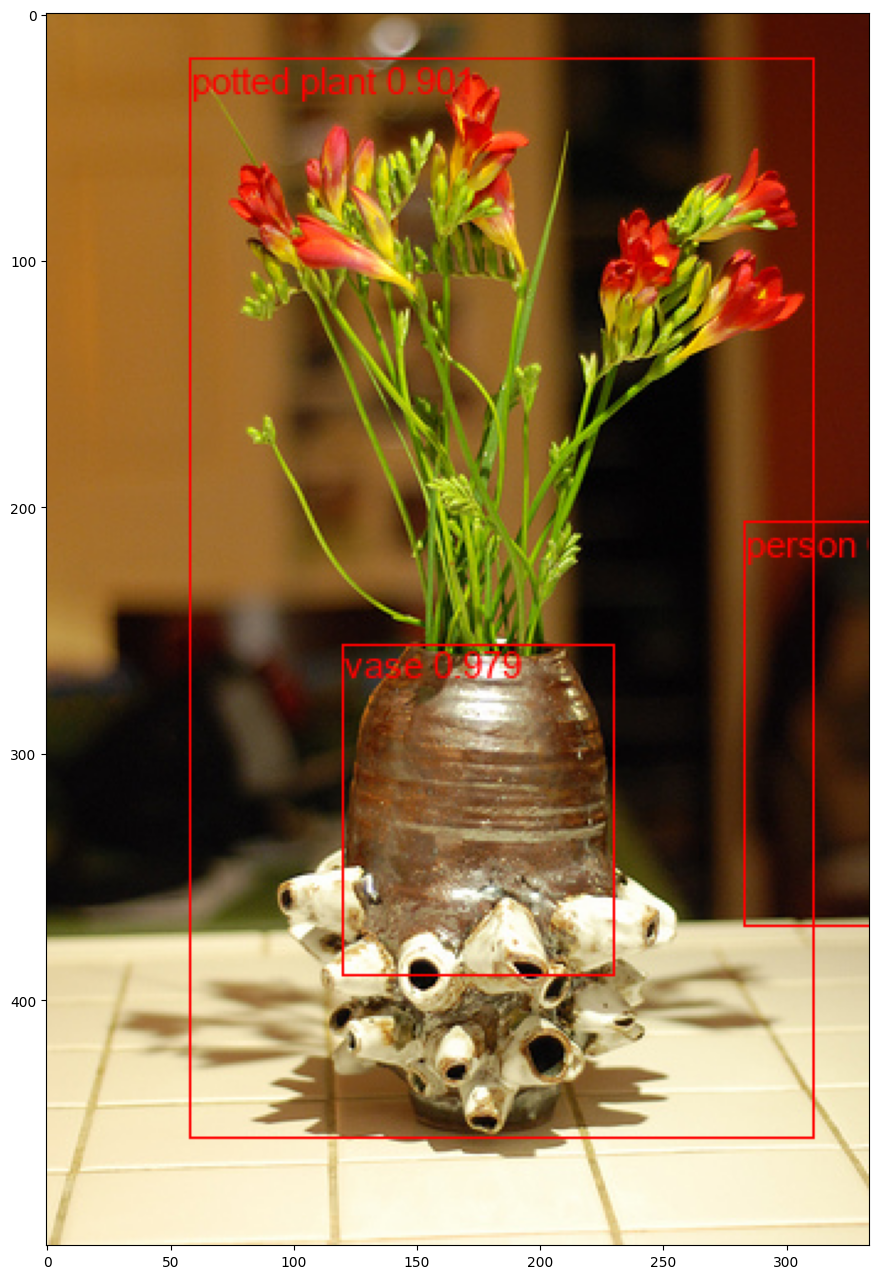

['person', 'potted plant', 'vase']


In [6]:
all_images = glob.glob('data/detection/images/*.jpg')
rand_idx = np.random.randint(0, len(all_images))
image = all_images[rand_idx]
objects_detected = inference_od(image)
print(objects_detected)